In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from utils import get_face_rect, calculate_adaptive_skin_mask, calculate_mean_deviation

[[[186 196 206]
  [183 194 204]
  [185 195 205]
  ...
  [177 180 178]
  [178 182 179]
  [173 176 173]]

 [[186 196 206]
  [185 195 205]
  [185 195 205]
  ...
  [180 183 180]
  [178 182 179]
  [175 178 175]]

 [[183 195 202]
  [183 195 202]
  [185 196 203]
  ...
  [182 185 182]
  [181 184 181]
  [180 183 180]]

 ...

 [[ 62  55  63]
  [ 61  58  74]
  [ 60  56  73]
  ...
  [195 212 210]
  [195 212 210]
  [193 210 207]]

 [[ 60  55  63]
  [ 55  52  68]
  [ 53  49  66]
  ...
  [194 211 208]
  [193 210 207]
  [192 209 206]]

 [[ 56  53  62]
  [ 50  48  66]
  [ 45  43  62]
  ...
  [193 210 207]
  [193 210 207]
  [193 210 207]]]


error: OpenCV(4.5.2) /tmp/pip-req-build-rcdoave0/opencv/modules/imgproc/src/histogram.cpp:993: error: (-215:Assertion failed) mask.empty() || mask.type() == CV_8UC1 in function 'calcHist'


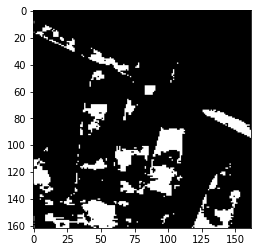

In [44]:
# head tracking with camshift
cap = cv.VideoCapture(0)

hand_cascade = cv.CascadeClassifier('palm.xml')

while True:
    _, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    palm = hand_cascade.detectMultiScale(gray)
    
    if len(palm) == 0:
        continue
    else:
        for (x, y, w, h) in palm:
            cv.rectangle(rgb, (x, y), (x+w, y+h), (255, 0, 0), 1)
            palm_rect = (x, y, w, h)
            palm_roi = rgb[y:y+h, x:x+w]
        break

_, face_rect = get_face_rect(cap)
# (fx, fy, fw, fh) = face_rect
vals = calculate_mean_deviation(cap)

track_window = (x-25, y-25, w+50, h+50)
roi = frame[y-25:y+h+25, x-25:x+w+25]
print(roi)
rgb_roi = cv.cvtColor(roi, cv.COLOR_BGR2RGB)
mask = calculate_adaptive_skin_mask(rgb_roi, vals)
plt.imshow(mask, 'gray')
roi_hist = cv.calcHist([rgb_roi], [0], mask, [0], [0, 256])

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)

while True:
    _, frame = cap.read()
    rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    # ycrcb = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)
    # mask = calculate_adaptive_skin_mask(rgb, vals, hide_rect=face_rect)

    # dst = cv.calcBackProject([rgb], [0], roi_hist, [0, 256], 1)
    
    # _, track_window = cv.CamShift(dst, track_window, term_crit)

    x, y, w, h = track_window
    cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))

    x1, y1, w1, h1 = palm_rect
    cv.rectangle(frame, (x1-25, y1-25), (x1+w1+25, y1+h1+25), (0, 0, 255))


    # cv.imshow('dst', dst)
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [5]:
cap = cv.VideoCapture(0)

ret, frame = cap.read()

print(frame.shape)#640x360
x, y, w, h = 100, 100, 300, 300
track_window = (x, y, w, h)

roi = frame[y:y + h, x:x + w]
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])#Calculate histogram
cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    if ret is True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
       
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        x, y, w, h = track_window
        
        img2 = cv.rectangle(frame, (x, y), (x + w, y + h), (255,0,0), 2)
        cv.imshow('img2', img2)
        cv.imshow('dst', dst)
       
        if cv.waitKey(1) == ord('q'):
            break
    else:
        break
cv.destroyAllWindows()
cap.release()

(480, 640, 3)


In [45]:
cap.release()